In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("DS1_C4_S8_Smartphones_Data_Challenge.csv")
df

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.0,0,...,64,6.10,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.0,0,...,128,6.10,60,2,ios,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.0,1,...,64,6.50,60,3,ios,12.0,12.0,0,2688,1242
3,apple,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,NaN,0,...,64,6.10,60,2,ios,12.0,12.0,0,2532,1170
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,NaN,0,...,128,6.10,60,2,ios,12.0,12.0,0,2532,1170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,xiaomi,Xiaomi Redmi Note 9 Pro,13999,7.5,0,snapdragon,8.0,2.30,5020.0,1,...,64,6.67,60,4,android,48.0,16.0,1,2400,1080
976,xiaomi,Xiaomi Redmi Note 9 Pro (4GB RAM + 128GB),14439,7.7,0,snapdragon,8.0,2.30,5020.0,1,...,128,6.67,60,4,android,48.0,16.0,1,2400,1080
977,xiaomi,Xiaomi Redmi Note 9 Pro Max,16490,8.0,0,snapdragon,8.0,2.30,5020.0,1,...,64,6.67,60,4,android,64.0,32.0,1,2400,1080
978,zte,ZTE Axon 30S,19999,8.2,1,snapdragon,8.0,3.20,4200.0,1,...,128,6.90,120,4,android,50.0,16.0,1,2460,1080


# camera Analysis
Which smartphones offer the highest quality rear and front-facing cameras in terms of megapixel count and additional camera features?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   avg_rating                 879 non-null    float64
 4   5G_or_not                  980 non-null    int64  
 5   processor_brand            960 non-null    object 
 6   num_cores                  974 non-null    float64
 7   processor_speed            938 non-null    float64
 8   battery_capacity           969 non-null    float64
 9   fast_charging_available    980 non-null    int64  
 10  fast_charging              769 non-null    float64
 11  ram_capacity               980 non-null    int64  
 12  internal_memory            980 non-null    int64  
 13  screen_size                980 non-null    float64

In [5]:
def seperate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:
        if df[column].nunique() < 10:
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous

categorical, continuous = seperate_data_types(df)

#Tabulate is a package used to print the list, dict or any data sets in a proper format; in a table format

from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical, "Continuous":continuous}, headers = ["categorical", "continuous"]))

categorical                continuous
-------------------------  --------------------
5G_or_not                  brand_name
num_cores                  model
fast_charging_available    price
ram_capacity               avg_rating
internal_memory            processor_brand
refresh_rate               processor_speed
num_rear_cameras           battery_capacity
os                         fast_charging
extended_memory_available  screen_size
                           primary_camera_rear
                           primary_camera_front
                           resolution_height
                           resolution_width


In [6]:
def numerical_info(data, numerical):
    for col in numerical:
        mean = data[col].mean()
        median = data[col].median()
        mode = data[col].mode()[0]
        std = data[col].std()
        min_val = data[col].min()
        max_val = data[col].max()
        print(f"{col}:")
        print("Mean:", mean)
        print("Median:", median)
        print("Mode:", mode)
        print("Standard Deviation:", std)
        print("Minimum:", min_val)
        print("Maximum:", max_val)
        print()

In [7]:
numerical_info(df,["primary_camera_rear"])

primary_camera_rear:
Mean: 50.31928571428572
Median: 50.0
Mode: 50.0
Standard Deviation: 33.00096828213883
Minimum: 2.0
Maximum: 200.0



In [8]:
numerical_info(df,["primary_camera_front"])

primary_camera_front:
Mean: 16.58974358974359
Median: 16.0
Mode: 16.0
Standard Deviation: 10.876943638338766
Minimum: 0.0
Maximum: 60.0



In [9]:
a=pd.DataFrame(df.groupby(by=["brand_name"])["primary_camera_front"].mean())
a

,primary_camera_front
brand_name,
apple,11.456522
asus,16.571429
blackview,8.000000
blu,16.000000
cat,2.000000
cola,16.000000
doogee,32.000000
duoqin,2.000000
gionee,7.666667


In [10]:
front_camera_sorted=a.sort_values(by='primary_camera_front',ascending=False)
front_camera_sorted

,primary_camera_front
brand_name,
royole,32.000000
doogee,32.000000
tesla,32.000000
motorola,24.019231
vivo,21.216216
huawei,19.733333
oneplus,19.357143
lg,19.333333
oppo,19.252874


<Axes: xlabel='brand_name'>

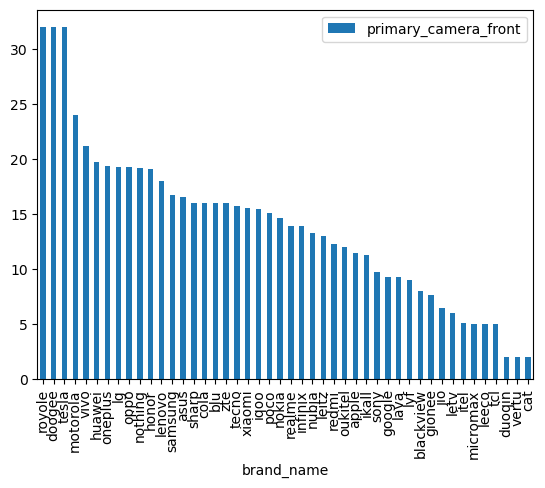

In [11]:
front_camera_sorted.plot(kind="bar")

In [12]:
b=pd.DataFrame(df.groupby(by=["brand_name"])["primary_camera_rear"].mean())
b

,primary_camera_rear
brand_name,
apple,20.760870
asus,54.000000
blackview,13.000000
blu,48.000000
cat,5.000000
cola,50.000000
doogee,108.000000
duoqin,8.000000
gionee,14.000000


In [13]:
rear_camera_sorted=b.sort_values(by='primary_camera_rear',ascending=False)
rear_camera_sorted

,primary_camera_rear
brand_name,
doogee,108.000000
redmi,88.666667
nokia,79.769231
motorola,67.230769
honor,66.692308
xiaomi,65.300746
royole,64.000000
lenovo,64.000000
nubia,59.333333


<Axes: xlabel='brand_name'>

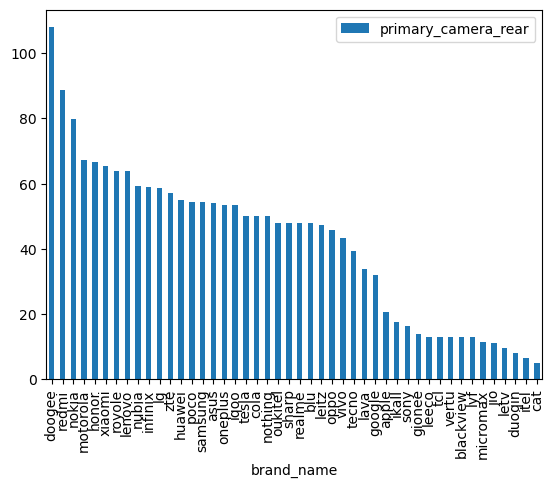

In [14]:
rear_camera_sorted.plot(kind="bar")

Are there any differences in camera performance between flagship smartphones and mid-  range devices?

In [15]:
rear_camera_sorted

,primary_camera_rear
brand_name,
doogee,108.000000
redmi,88.666667
nokia,79.769231
motorola,67.230769
honor,66.692308
xiaomi,65.300746
royole,64.000000
lenovo,64.000000
nubia,59.333333


In [16]:
front_camera_sorted

,primary_camera_front
brand_name,
royole,32.000000
doogee,32.000000
tesla,32.000000
motorola,24.019231
vivo,21.216216
huawei,19.733333
oneplus,19.357143
lg,19.333333
oppo,19.252874


array([[<Axes: title={'center': 'primary_camera_rear'}>]], dtype=object)

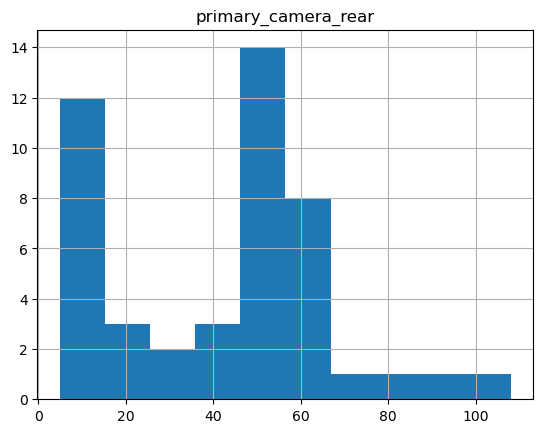

In [17]:
rear_camera_sorted.hist()

In [18]:
def num_num(num1, num2):
    plt.scatter(df[num1], df[num2])
    plt.title(num1+ "vs" + num2 )       #stringwise concatination
    plt.xlabel(num1 + "   correlation value = "+str(df[num1].corr(df[num2])))         #stringwise concatination
    plt.ylabel(num2)
    plt.show()

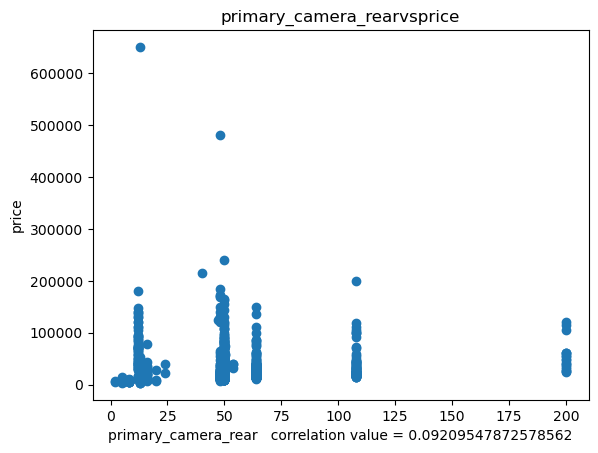

In [19]:
num_num("primary_camera_rear","price")

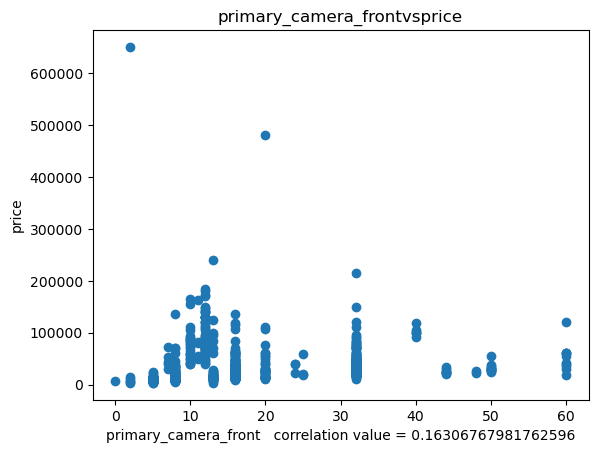

In [20]:
num_num("primary_camera_front","price")

In [21]:
c=pd.DataFrame(df.groupby(by=["price"])["primary_camera_rear"].mean())
c

,primary_camera_rear
price,
3499,13.0
3890,13.0
3990,13.0
3999,5.0
4499,5.0
...,...
199990,108.0
214990,40.0
239999,50.0


In [22]:
c.sort_values(by="price", ascending=False)

,primary_camera_rear
price,
650000,13.0
480000,48.0
239999,50.0
214990,40.0
199990,108.0
...,...
4499,5.0
3999,5.0
3990,13.0


In [ ]:
num_num("processor_speed","price")

How do different processor brands (e.g., Snapdragon, Exynos, Dimensity) compare in terms of speed, number of cores, and overall performance?

In [44]:
performance= df[["processor_brand","processor_speed","num_cores","battery_capacity"]]

In [47]:
performance_chart = performance.sort_values(by="processor_speed", ascending=False)[:100]
performance_chart

,processor_brand,processor_speed,num_cores,battery_capacity
23,bionic,3.22,6.0,3279.0
14,bionic,3.22,6.0,2438.0
43,bionic,3.22,6.0,NaN
27,bionic,3.22,6.0,4325.0
26,bionic,3.22,6.0,4325.0
...,...,...,...,...
50,dimensity,3.20,8.0,6000.0
49,snapdragon,3.20,8.0,6000.0
48,dimensity,3.20,8.0,6000.0
47,snapdragon,3.20,8.0,6000.0


In [43]:
plot

TypeError: scatter() missing 1 required positional argument: 'y'

In [54]:
x=df[["os","brand_name"]]
x

,os,brand_name
0,ios,apple
1,ios,apple
2,ios,apple
3,ios,apple
4,ios,apple
...,...,...
975,android,xiaomi
976,android,xiaomi
977,android,xiaomi
978,android,zte


In [57]:
z=df.groupby(by=["brand_name"])["os"].count()

In [58]:
plt.pie(x=z["os"], labels=z["brand_name"], autopct ="%0.2f%%");

KeyError: 'os'

Are there any significant differences in user behavior and app usage patterns between Android and iOS users?

In [60]:
v=df["os"]=="ios"

In [75]:
os=df.groupby(by=["os"])["processor_speed"].mean()
os

os
android    2.394150
ios        3.074375
other      2.790000
Name: processor_speed, dtype: float64

<Axes: xlabel='os'>

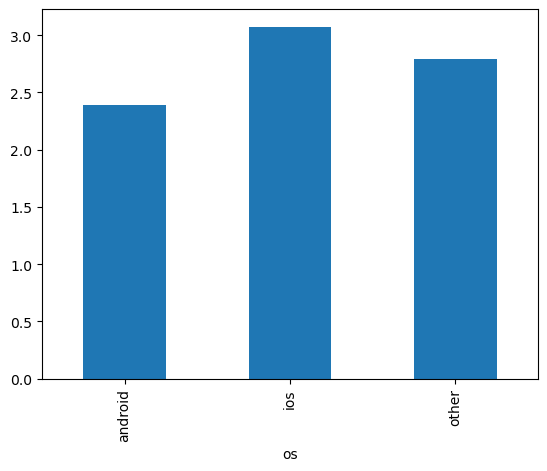

In [76]:
os.plot(kind="bar")